# MNIST Handwritten Digit Classification

## Importing the Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the MNIST data from keras.datasets

In [2]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step 


## scaling the values

In [3]:
X_train = X_train/255
X_test = X_test/255

## Building the Neural Network

In [5]:
import tensorflow as tf
model = tf.keras.Sequential([
                          tf.keras.layers.Flatten(input_shape=(28,28)),
                          tf.keras.layers.Dense(50, activation='relu'),
                          tf.keras.layers.Dense(50, activation='relu'),
                          tf.keras.layers.Dense(10, activation='sigmoid')
])

C:\Users\DELL\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

## training the Neural Network

In [7]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9142 - loss: 0.2957
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9586 - loss: 0.1369
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9683 - loss: 0.1037
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9744 - loss: 0.0839
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9789 - loss: 0.0695
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9819 - loss: 0.0590
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9837 - loss: 0.0509
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9851 - loss: 0.0448
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9870 - loss: 0.0401
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9888 - loss: 0.0360


## Predicting the Test Result

In [8]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step


In [11]:
from tensorflow.math import confusion_matrix
Y_pred_labels = [np.argmax(i) for i in Y_pred]
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    0,    2,    0,    8,    2,    0,    2,    2],
       [   0, 1128,    2,    0,    0,    1,    2,    1,    1,    0],
       [   2,    3, 1009,    8,    2,    1,    1,    3,    3,    0],
       [   0,    0,    5,  988,    0,    6,    0,    4,    2,    5],
       [   1,    1,    8,    1,  956,    0,    3,    3,    1,    8],
       [   2,    1,    0,   11,    2,  869,    5,    0,    1,    1],
       [   4,    2,    2,    2,    9,    9,  928,    0,    1,    1],
       [   0,    4,    8,    6,    1,    0,    0,  997,    0,   12],
       [   5,    1,    6,   27,    3,   11,    4,    1,  909,    7],
       [   1,    2,    0,    5,    7,    7,    1,    5,    0,  981]],
      dtype=int32)>

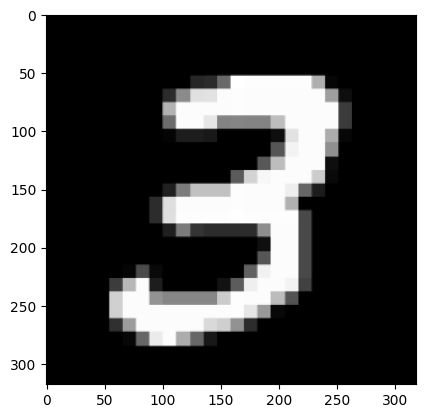

In [14]:
import cv2
input_image = cv2.imread('MNIST_digit.png')
plt.imshow(input_image)

In [18]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale, (28, 28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [20]:
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
3
